In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 加载数据

In [2]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
print(y)
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY')})
X

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像
0,s,s,N
1,s,l,Y
2,l,m,Y
3,m,m,Y
4,l,m,Y
5,m,l,N
6,m,s,Y
7,l,m,Y
8,m,s,Y
9,s,s,Y


# 数据转换

In [3]:
# 代码只执行一次
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

,日志密度,好友密度,真实头像
0,0,0,0
1,0,2,1
2,2,1,1
3,1,1,1
4,2,1,1
5,1,2,0
6,1,0,1
7,2,1,1
8,1,0,1
9,0,0,1


# 建模和预测

In [4]:
model = DecisionTreeClassifier(criterion='entropy') # criterion裂分标准
model.fit(X,y)
model.score(X,y)

0.9

# 对上面的决策树进行可视化

In [5]:
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]

['DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmr10',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmex10',
 'cmsy10',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'cmb10',
 'Herculanum',
 'Farah',
 'Comic Sans MS',
 'Noto Sans Psalter Pahlavi',
 'Noto Sans Adlam',
 'Noto Sans Mende Kikakui',
 'Palatino',
 'Impact',
 '.Aqua Kana',
 'Big Caslon',
 'Noto Sans Sundanese',
 'Apple SD Gothic Neo',
 'Gujarati MT',
 'Noto Sans Meroitic',
 'Beirut',
 'Verdana',
 'Noto Sans Caucasian Albanian',
 'Helvetica Neue',
 'Suk

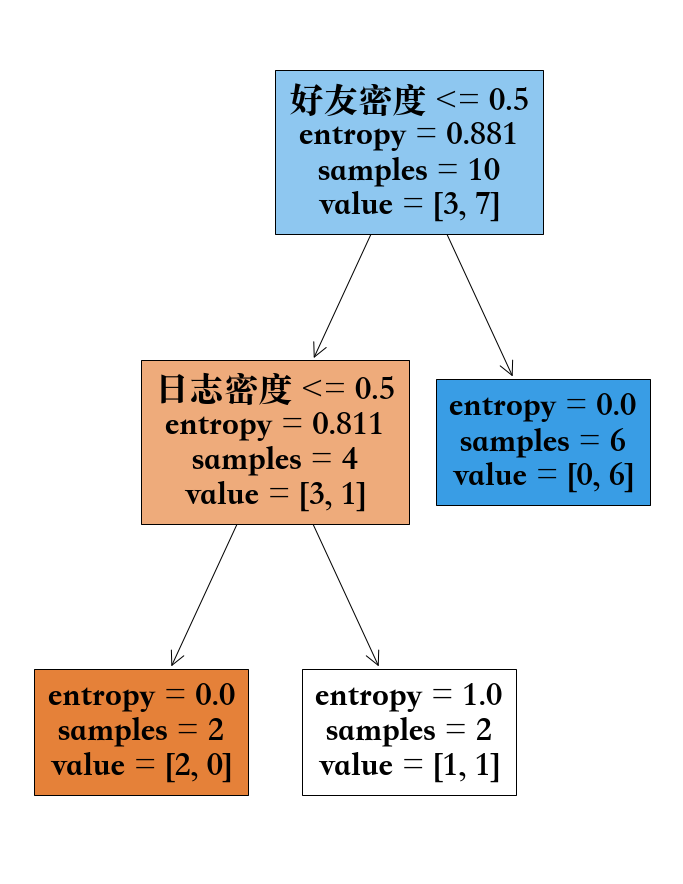

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Songti SC'
plt.figure(figsize=(12,16))
fn = X.columns

_ = tree.plot_tree(model,filled=True,feature_names=fn)
# plt.savefig('./决策树.png',dpi = 100)

# 可视化二

In [7]:
np.unique(y)

array(['N', 'Y'], dtype='<U1')

In [ ]:
import graphviz

# tree 是sklearn中的模块，提供导出数据的方法
dot_data = tree.export_graphviz(model,filled=True,
                                feature_names=fn,rounded=True,
                                class_names = np.unique(y))

graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render('./决策树2',format='png')

# 修改中文乱码

In [ ]:
import re

# 乱码的文件
f = open('./决策树2','r',encoding='utf-8')

# 修改
with open('./决策树3','w',encoding='utf8') as fp:
    
    s = re.sub(r'fontname=helvetica', 'fontname=STKaiti', f.read())
    
    fp.write(s)

f.close()

In [ ]:
graph = graphviz.Source.from_file('./决策树3')

# 保存数据
graph.render('./决策树3',format='png')

# 手动计算决策树到底是如何分类的

## 计算未分类的信息熵

In [9]:
p1 = (y == 'N').mean()
p2 = (y == 'Y').mean()
print(p1,p2)

0.3 0.7


𝐻(𝑥)=∑𝑖=1𝑛𝑝(𝑥)𝑙𝑜𝑔21𝑝(𝑥)

In [10]:
p1 * np.log2(1/p1) + p2 * np.log2(1/p2)

0.8812908992306926

## 按照日志密度进行划分求信息熵

In [11]:
X['真实用户'] = y
X

,日志密度,好友密度,真实头像,真实用户
0,0,0,0,N
1,0,2,1,Y
2,2,1,1,Y
3,1,1,1,Y
4,2,1,1,Y
5,1,2,0,Y
6,1,0,1,N
7,2,1,1,Y
8,1,0,1,Y
9,0,0,1,N


In [12]:
x = X['日志密度'].unique()
x.sort() # 排序,属性值，0,1,2
print(x)
for i in range(len(x) -1):
    split = x[i : i +2].mean() # 裂分值
    cond = X['日志密度'] <= split # 分成两边，每一边分别计算信息熵
    
    # 计算概率分布，左边概率是多少，右边的概率是多少
    p = cond.value_counts()/cond.size
    
    indexs = p.index # True,False
    
    entropy = 0
    for index in indexs:
        user = X[cond == index]['真实用户'] # 取出了目标值y的数据
        
        p_user = user.value_counts()/user.size
        # 每个分支的信息熵
        entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
    print(split,entropy)

[0 1 2]
0.5 0.689659695223976
1.5 0.689659695223976


In [13]:
# 日志密度：信息增益
0.881 - 0.6897

0.19130000000000003

## 按照好友密度进行划分求信息熵

In [15]:
x = X['好友密度'].unique()
x.sort() # 排序,属性值，0,1,2
print(x)
for i in range(len(x) -2):
    split = x[i : i +2].mean() # 裂分值
    cond = X['好友密度'] <= split # 分成两边，每一边分别计算信息熵
    
    # 计算概率分布，左边概率是多少，右边的概率是多少
    p = cond.value_counts()/cond.size
    
    indexs = p.index # True,False
    
    entropy = 0
    for index in indexs:
        user = X[cond == index]['真实用户'] # 取出了目标值y的数据
        
        p_user = user.value_counts()/user.size
        # 每个分支的信息熵
        e = (p_user * np.log2(1/p_user)).sum() * p[index]
        entropy += e
        print('------------',p[index],(p_user * np.log2(1/p_user)).sum())
#     print(split,entropy)

[0 1 2]
------------ 0.6 0.0
------------ 0.4 0.8112781244591328


## 按照是否使用真实头像划分信息熵

In [16]:
x = X['真实头像'].unique()
x.sort() # 排序,属性值，0,1,2
print(x)
for i in range(len(x) -1):
    split = x[i : i +2].mean() # 裂分值
    cond = X['真实头像'] <= split # 分成两边，每一边分别计算信息熵
    
    # 计算概率分布，左边概率是多少，右边的概率是多少
    p = cond.value_counts()/cond.size
    
    indexs = p.index # True,False
    
    entropy = 0
    for index in indexs:
        user = X[cond == index]['真实用户'] # 取出了目标值y的数据
        
        p_user = user.value_counts()/user.size
        # 每个分支的信息熵
        entropy += (p_user * np.log2(1/p_user)).sum() * p[index]
    print(split,entropy)

[0 1]
0.5 0.8490224995673064


In [17]:
# 真实头像：信息增益
0.881 - 0.849

0.03200000000000003

# 使用gini系数计算决策树

## 建模可视化

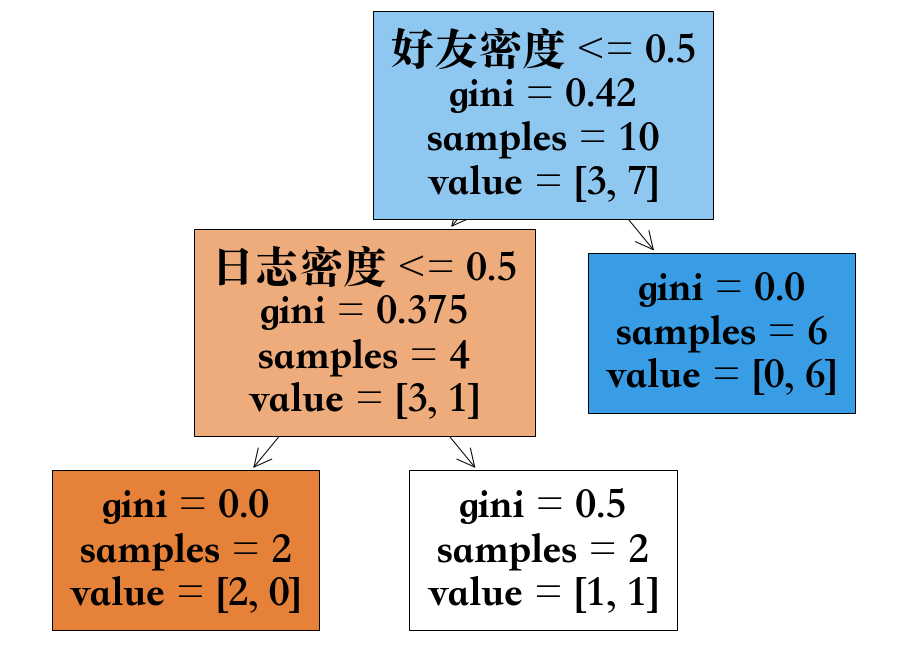

In [27]:
model = DecisionTreeClassifier(criterion='gini')

model.fit(X.iloc[:,:-1],y)

dot_data = tree.export_graphviz(model,filled=True,feature_names=X.columns[:3],rounded=True)
plt.figure(figsize=(16,12))
_ = tree.plot_tree(model,filled=True,feature_names=fn)

## 代码构建决策树

### 未分类gini系数值

In [19]:
s = X['真实用户']

p = s.value_counts()/s.size

print(p)

np.round((p * (1 - p)).sum(),3)

Y    0.7
N    0.3
Name: 真实用户, dtype: float64


0.42

### 三种属性对目标值进行划分

In [20]:
x = X['日志密度'].unique()
x.sort()

# 如何划分呢，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['日志密度'] <= split
    
    # 概率分布
    p = cond.value_counts()/cond.size
    
    # 按照条件划分，两边的概率分布情况
    indexs =p.index
    gini = 0
    for index in indexs:
        user = X[cond == index]['真实用户']
        p_user = user.value_counts()/user.size
        
        gini += (p_user * (1-p_user)).sum() * p[index]
        
    print(split,gini)

0.5 0.3047619047619048
1.5 0.3428571428571428


In [21]:
x = X['好友密度'].unique()
x.sort()
# 如何划分呢，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['好友密度'] <= split
    # 概率分布
    p = cond.value_counts()/cond.size
    # 按照条件划分，两边的概率分布情况
    indexs =p.index
    gini = 0
    for index in indexs:
        user = X[cond == index]['真实用户']
        p_user = user.value_counts()/user.size
        gini += (p_user * (1-p_user)).sum() * p[index]
    print(split,gini)

0.5 0.15000000000000002
1.5 0.375


In [22]:
x = X['真实头像'].unique()
x.sort()
# 如何划分呢，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['真实头像'] <= split
    # 概率分布
    p = cond.value_counts()/cond.size
    # 按照条件划分，两边的概率分布情况
    indexs =p.index
    gini = 0
    for index in indexs:
        user = X[cond == index]['真实用户']
        p_user = user.value_counts()/user.size
        gini+= (p_user * (1-p_user)).sum() * p[index]
    print(split,gini)

0.5 0.4


### 综合对比

In [23]:
# 日志密度 0.5 0.3047619047619048
# 好友密度 0.5 0.15000000000000002
# 真实头像 0.5 0.4

# gini系数变化最大的是好友密度的划分
# 所以，选择好友密度 <= 0.5作为裂分条件

x = X['好友密度'].unique()
x.sort()
# 如何划分呢，分成两部分
for i in range(len(x) - 1):
    split = x[i:i+2].mean()
    cond = X['好友密度'] <= split
    # 概率分布
    p = cond.value_counts()/cond.size
    # 按照条件划分，两边的概率分布情况
    indexs =p.index
    gini= 0
    for index in indexs:
        user = X[cond == index]['真实用户']
        p_user = user.value_counts()/user.size
        gini += (p_user * (1-p_user)).sum() * p[index]
        
        print('裂分条件：%0.1f'%(split),'gini系数%0.3f'%((p_user * (1-p_user)).sum()),'比例：%0.1f'%(p[index]))
    print('------------------------------------------------')
#     print(split,entropy)

裂分条件：0.5 gini系数0.000 比例：0.6
裂分条件：0.5 gini系数0.375 比例：0.4
------------------------------------------------
裂分条件：1.5 gini系数0.469 比例：0.8
裂分条件：1.5 gini系数0.000 比例：0.2
------------------------------------------------


# 决策树--条件筛选决策树根节点

In [28]:
import numpy as np
import pandas as pd
y = np.array(list('NYYYYYNYYN'))
print(y)
X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY'),
                  '真实用户':y})
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像,真实用户
0,0,0,0,N
1,0,2,1,Y
2,2,1,1,Y
3,1,1,1,Y
4,2,1,1,Y
5,1,2,0,Y
6,1,0,1,N
7,2,1,1,Y
8,1,0,1,Y
9,0,0,1,N


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

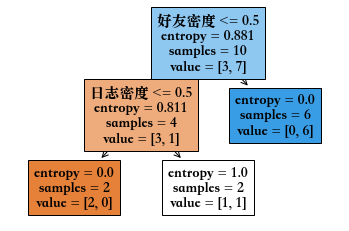

In [30]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X.iloc[:,:-1],y)
# dot 点
# dot_data = tree.export_graphviz(model,filled=True,rounded=True,feature_names=X.columns[:-1])
# graphviz.Source(dot_data)
_ = tree.plot_tree(model,filled=True,feature_names=X.columns[:-1])

In [31]:
cols = ['日志密度','好友密度','真实头像']
lower_entropy = 3 # 最小的信息熵
best_split = {} # 最佳裂分条件
for col in cols:
    x = X[col].unique() # 0,1,2
    x.sort()
    # 如何根据这一列来进行划分呢？
    for i in range(len(x) - 1):# 裂分点，裂分值
        split = x[i:i + 2].mean()
        # 裂分的概率分布，左右，True，False
        cond = X[col] <= split
        p = cond.value_counts()/cond.size  
        indexs = p.index
        entroy = 0
        for index in indexs:
            user = X[cond == index]['真实用户']
            p_user = user.value_counts()/user.size
            entroy += (p_user * np.log2(1/p_user)).sum() * p[index]
        print(col,split,entroy)
        if entroy < lower_entropy:
            lower_entropy = entroy
            best_split.clear()
            best_split[col] = split       
print('最佳裂分条件是：',best_split)

日志密度 0.5 0.689659695223976
日志密度 1.5 0.689659695223976
好友密度 0.5 0.32451124978365314
好友密度 1.5 0.763547202339972
真实头像 0.5 0.8490224995673064
最佳裂分条件是： {'好友密度': 0.5}


# 决策树分类鸢尾花数据

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

feature_names = iris['feature_names']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=256)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# 测试数据，得分
print('测试数据得分：',model.score(X_test,y_test))

print('算法预测的结果：',model.predict(X_test))
print('真实结果是：   ',y_test)

测试数据得分： 0.9666666666666667
算法预测的结果： [0 2 2 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0]
真实结果是：    [0 2 1 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1 0 2 1 0 1 1 2 0 0 1 0 0]


In [34]:
# 逻辑斯蒂回归中，手动计算过概率
model.predict_proba(X_test)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

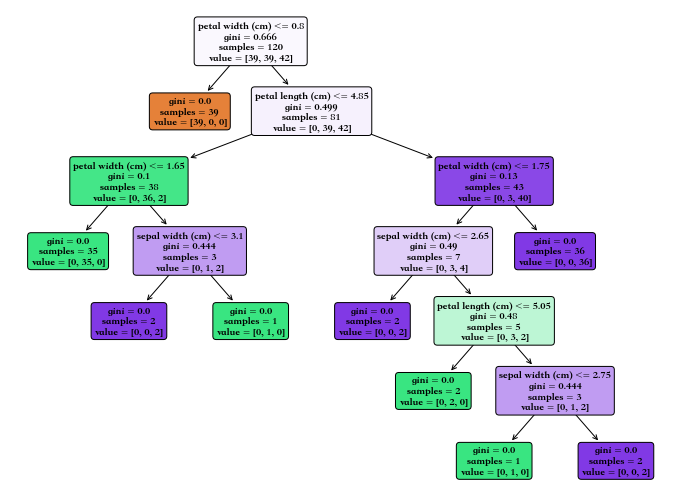

In [36]:
# dot_data = tree.export_graphviz(model,filled=True,rounded=True,feature_names=feature_names)

# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=True,feature_names=feature_names,rounded=True)

# 决策树剪枝

In [37]:
X_train.shape # 120个样本

(120, 4)

测试数据的准确率： 0.9666666666666667


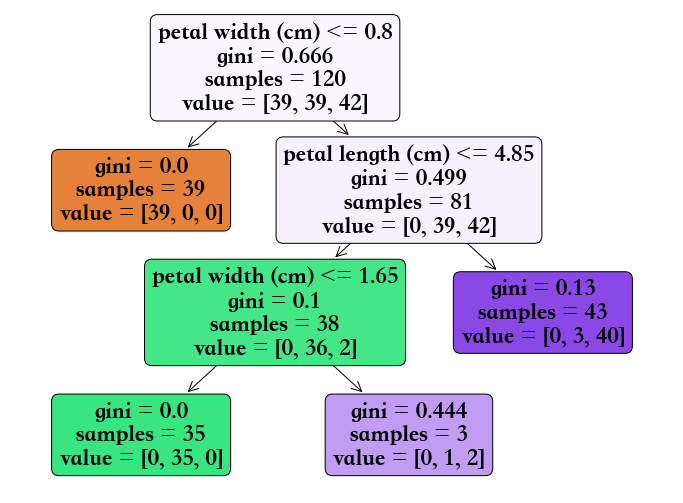

In [38]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=256)

# model = DecisionTreeClassifier(max_depth=3) # 决策树的最大深度是2，限制（树进行了限制==剪枝）
# 如果子节点纯度（熵，gini系数），小于 min_impurity_decrease，停止分裂，树不长了！
# 从而实现了树的剪枝
# model = DecisionTreeClassifier(min_impurity_decrease=0.2) # 节点划分最小不纯度
# model = DecisionTreeClassifier(min_samples_leaf=10) # 叶节点最小的样本数量
model = DecisionTreeClassifier(max_leaf_nodes=4) # 最大叶节点数量

model.fit(X_train,y_train)
print('测试数据的准确率：',model.score(X_test,y_test))

# dot_data = tree.export_graphviz(model,filled=True,rounded=True,feature_names = feature_names)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=True,feature_names=feature_names,rounded=True)

# 选择合适的超参数

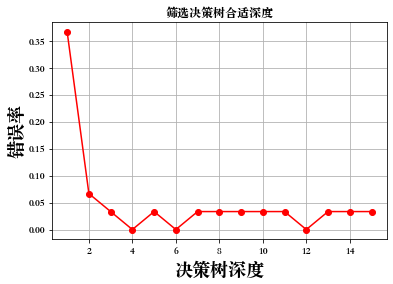

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=256)
depth = np.arange(1,16)
err = [] # 机器学习，误差 --->准确率

for d in depth:
    model = DecisionTreeClassifier(max_depth = d)
    
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test) # 准确率
    err.append(1 - accuracy)
    
plt.rcParams['font.family'] = 'Songti SC'
plt.plot(depth,err,'ro-')
plt.xlabel('决策树深度',fontsize= 18)
plt.ylabel('错误率',fontsize=  18)
plt.title('筛选决策树合适深度')
plt.grid() # 网格线

In [40]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [41]:
# 特征重要性
# 第一个特征，一定不重要~
# 是否可以删除第一个特征呢？ 是
# 删除了第一个特征，对决策树这个模型有影响吗？ 没有影响(DecisionTreeClassifier)
model.feature_importances_

array([0.        , 0.01719321, 0.92337463, 0.05943216])

In [42]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train[:,1:],y_train)
model.score(X_test[:,1:],y_test)

1.0

# 作业--葡萄酒数据决策树

In [52]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

X,y= datasets.load_wine(return_X_y=True)
# X = wine['data']
# y = wine['target']

# feature_names = wine['feature_names']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=256)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# 测试数据，得分
print('测试数据得分：',model.score(X_test,y_test))

print('算法预测的结果：',model.predict(X_test))
print('真实结果是：   ',y_test)

测试数据得分： 0.9444444444444444
算法预测的结果： [1 0 0 2 0 1 0 0 0 0 2 2 0 2 0 0 1 1 1 0 0 0 0 2 2 0 1 1 2 2 0 2 1 2 1 0]
真实结果是：    [1 0 0 2 0 1 0 0 0 0 2 2 0 2 0 0 1 0 1 0 0 0 0 2 2 0 1 0 2 2 0 2 1 2 1 0]


In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

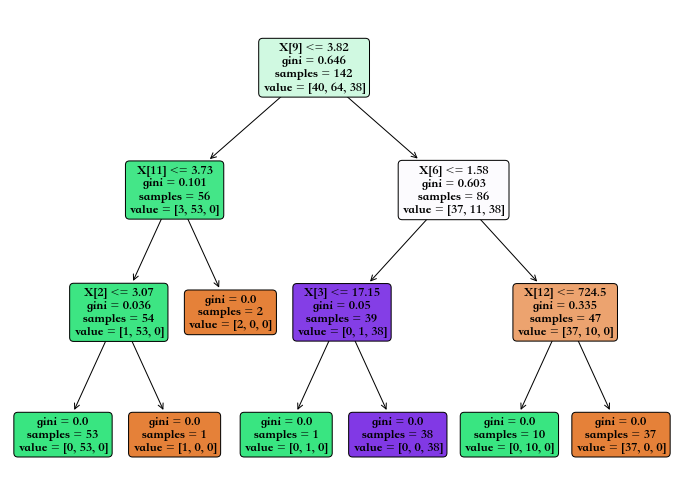

In [56]:
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=True,rounded=True)